In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


%matplotlib inline

### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.



In [2]:
def calc_mse(X, w, y_pred):
    y = X.dot(w)
    err = np.mean((y - y_pred)**2)
    return err

def gd(X, Y, iterations, alpha):
    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    while weight_dist > min_weight_dist and iter_num < iterations:
        new_w = w - 2 * alpha * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        errors.append(calc_mse(X, new_w, Y))
    
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
    return w_list, errors

def sgd(X, Y, iterations, alpha):
    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    np.random.seed(40)
    
    while weight_dist > min_weight_dist and iter_num < iterations:
        train_ind = np.random.randint(X.shape[0])
        new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - Y[train_ind])) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        errors.append(calc_mse(X, new_w, Y))
        
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
    return w_list, errors

In [3]:
# генерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

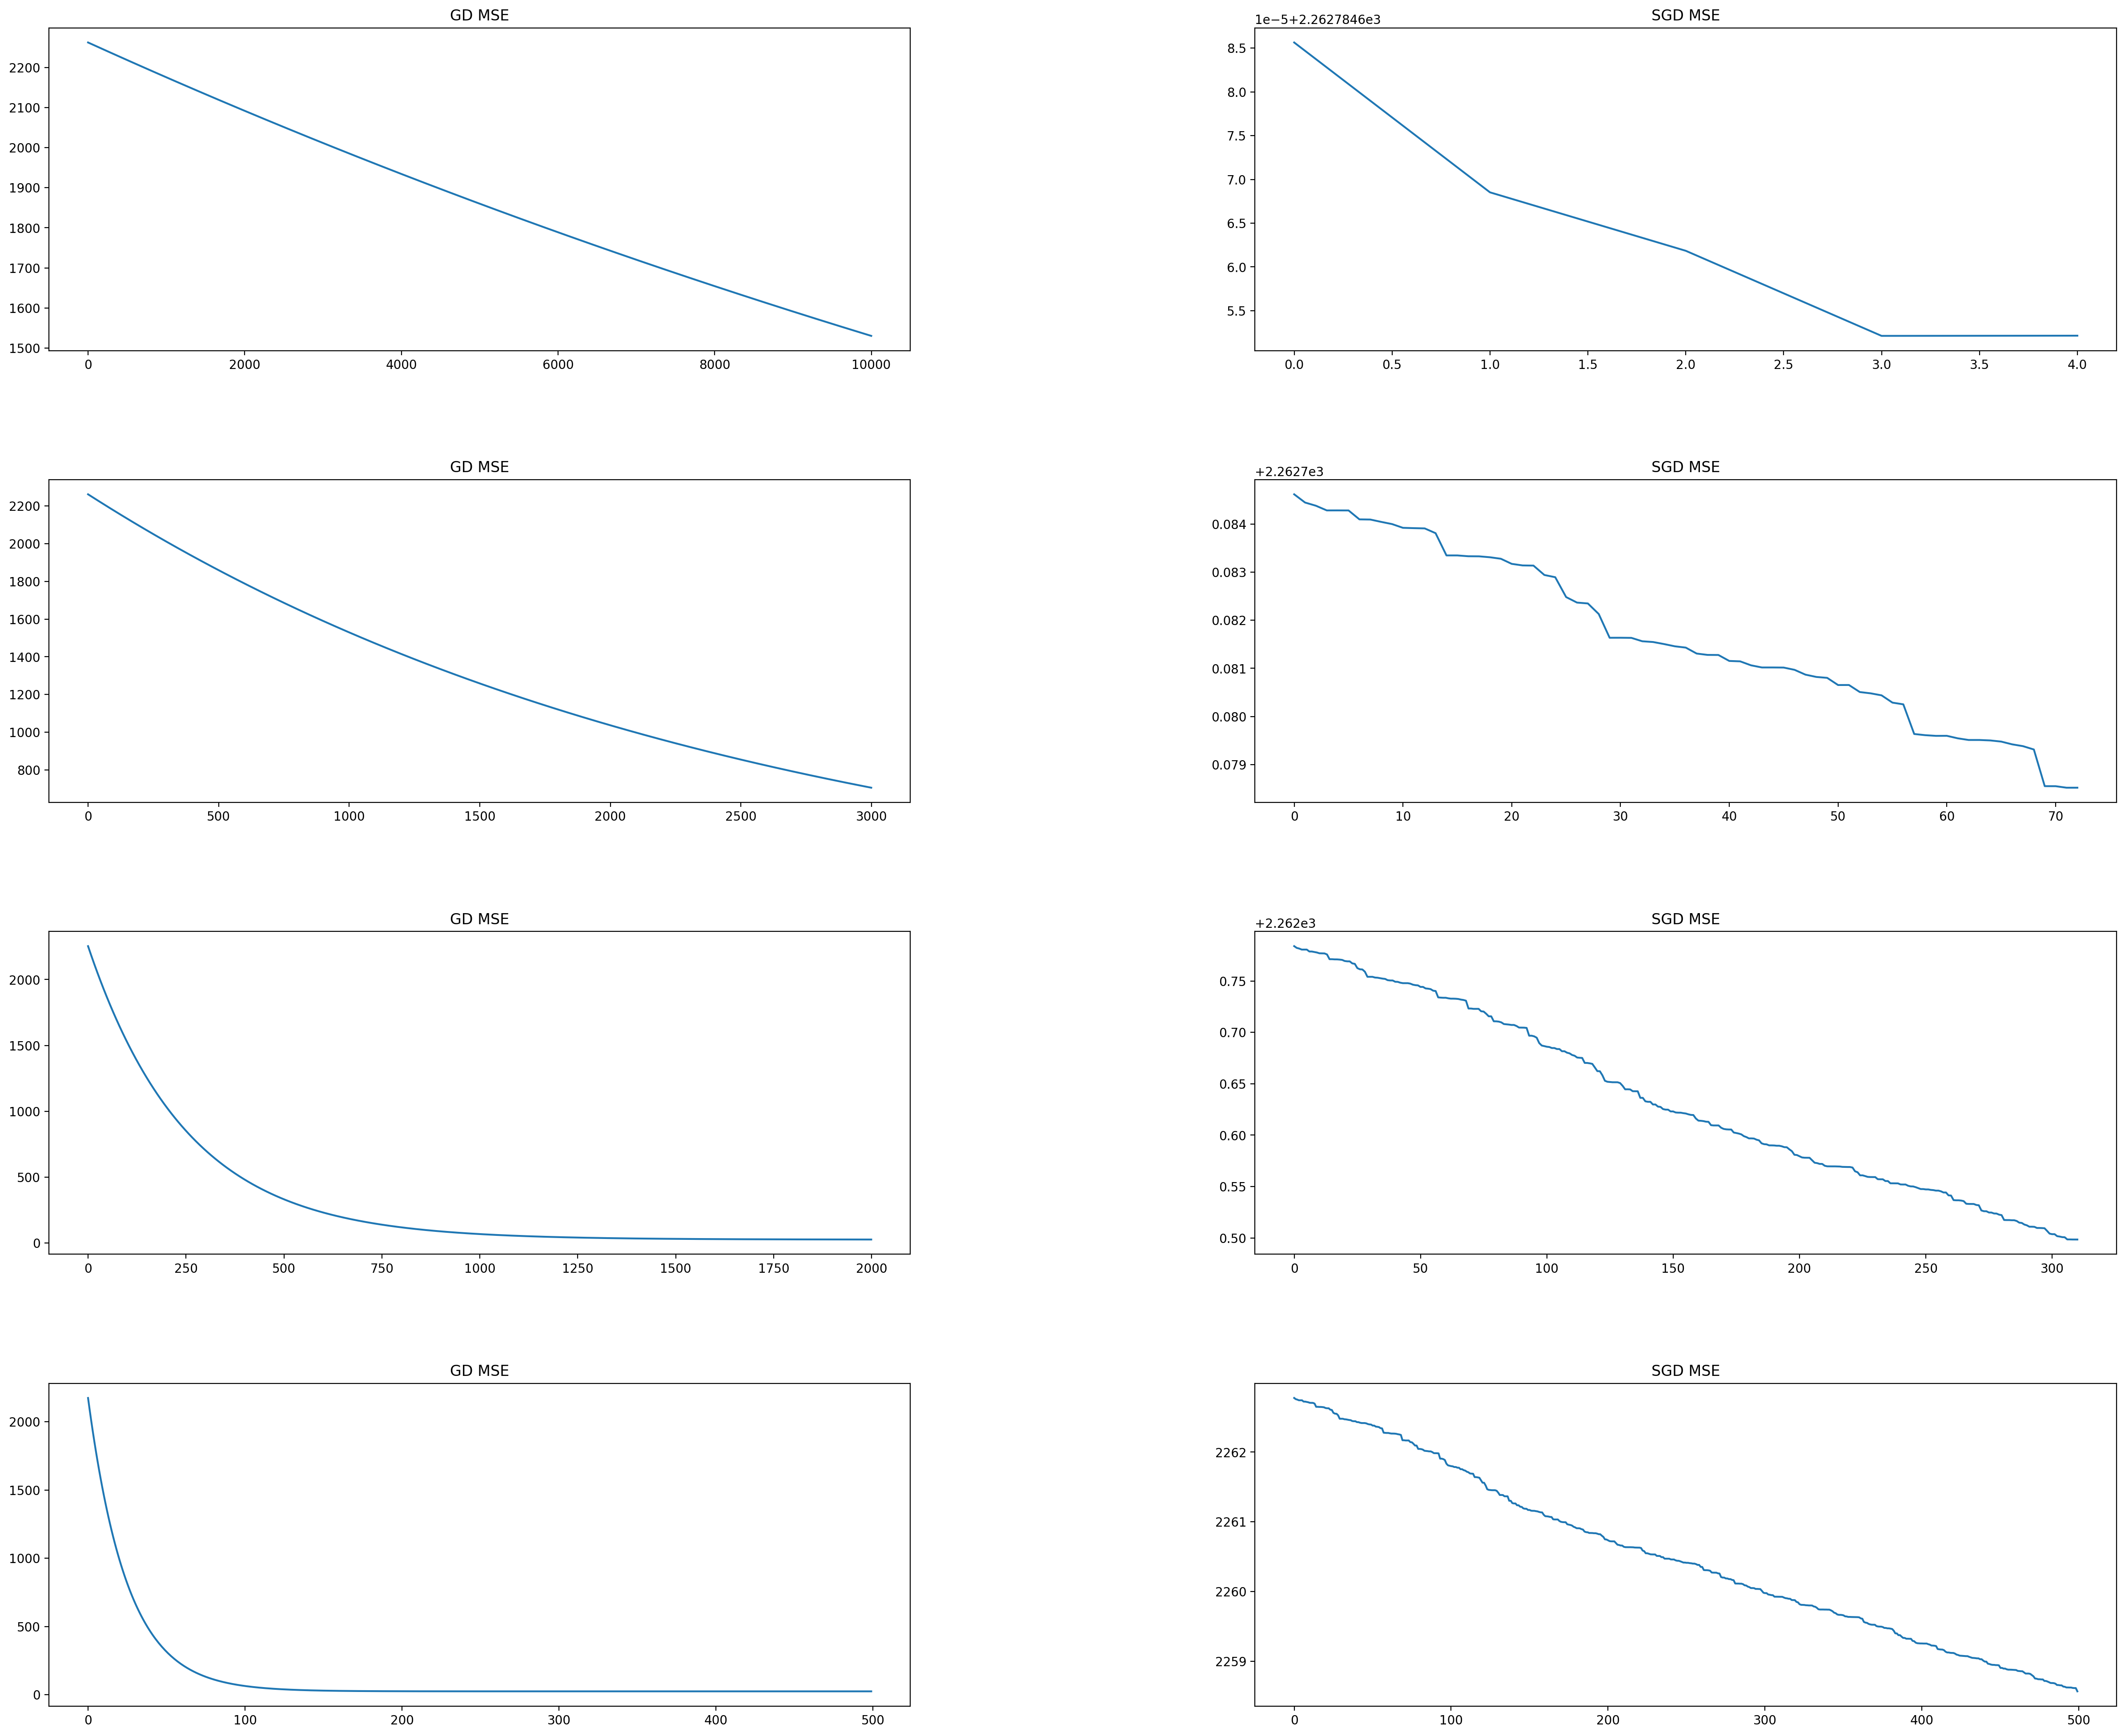

In [4]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(10000, 0.00001),(3000, 0.0001),(2000,0.001),(500,0.01)]

count =0

for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title(f'GD MSE')
    ax1.set_title(f"SGD MSE")
    
    W_GD, MSE_GD = gd(X=data, Y=target, iterations=n_iter, alpha=lr)
    W_SGD, MSE_SGD = sgd(X=data, Y=target, iterations=n_iter, alpha=lr)
    
    ax.plot(range(len(MSE_GD)), MSE_GD)
    ax1.plot(range(len(MSE_SGD)), MSE_SGD)   
    

*Скорость падения ошибки у SGD ниже, требуется больше итераций для достижения сходимости.*

### 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [5]:
def gd_l2(X, Y, iterations, alpha, lambda_):
    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    while weight_dist > min_weight_dist and iter_num < iterations:
        new_w = w - 2 * alpha * (np.dot(X.T, (np.dot(X, w) - Y)) + lambda_ * w) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        errors.append(calc_mse(X, new_w, Y))
    
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
    return w_list, errors

def sgd_l2(X, Y, iterations, alpha, lambda_):
    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    np.random.seed(40)
    
    while weight_dist > min_weight_dist and iter_num < iterations:
        train_ind = np.random.randint(X.shape[0])
        new_w = w - 2 * alpha * (np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - Y[train_ind])) + lambda_ * w) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        errors.append(calc_mse(X, new_w, Y))
        
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
    return w_list, errors

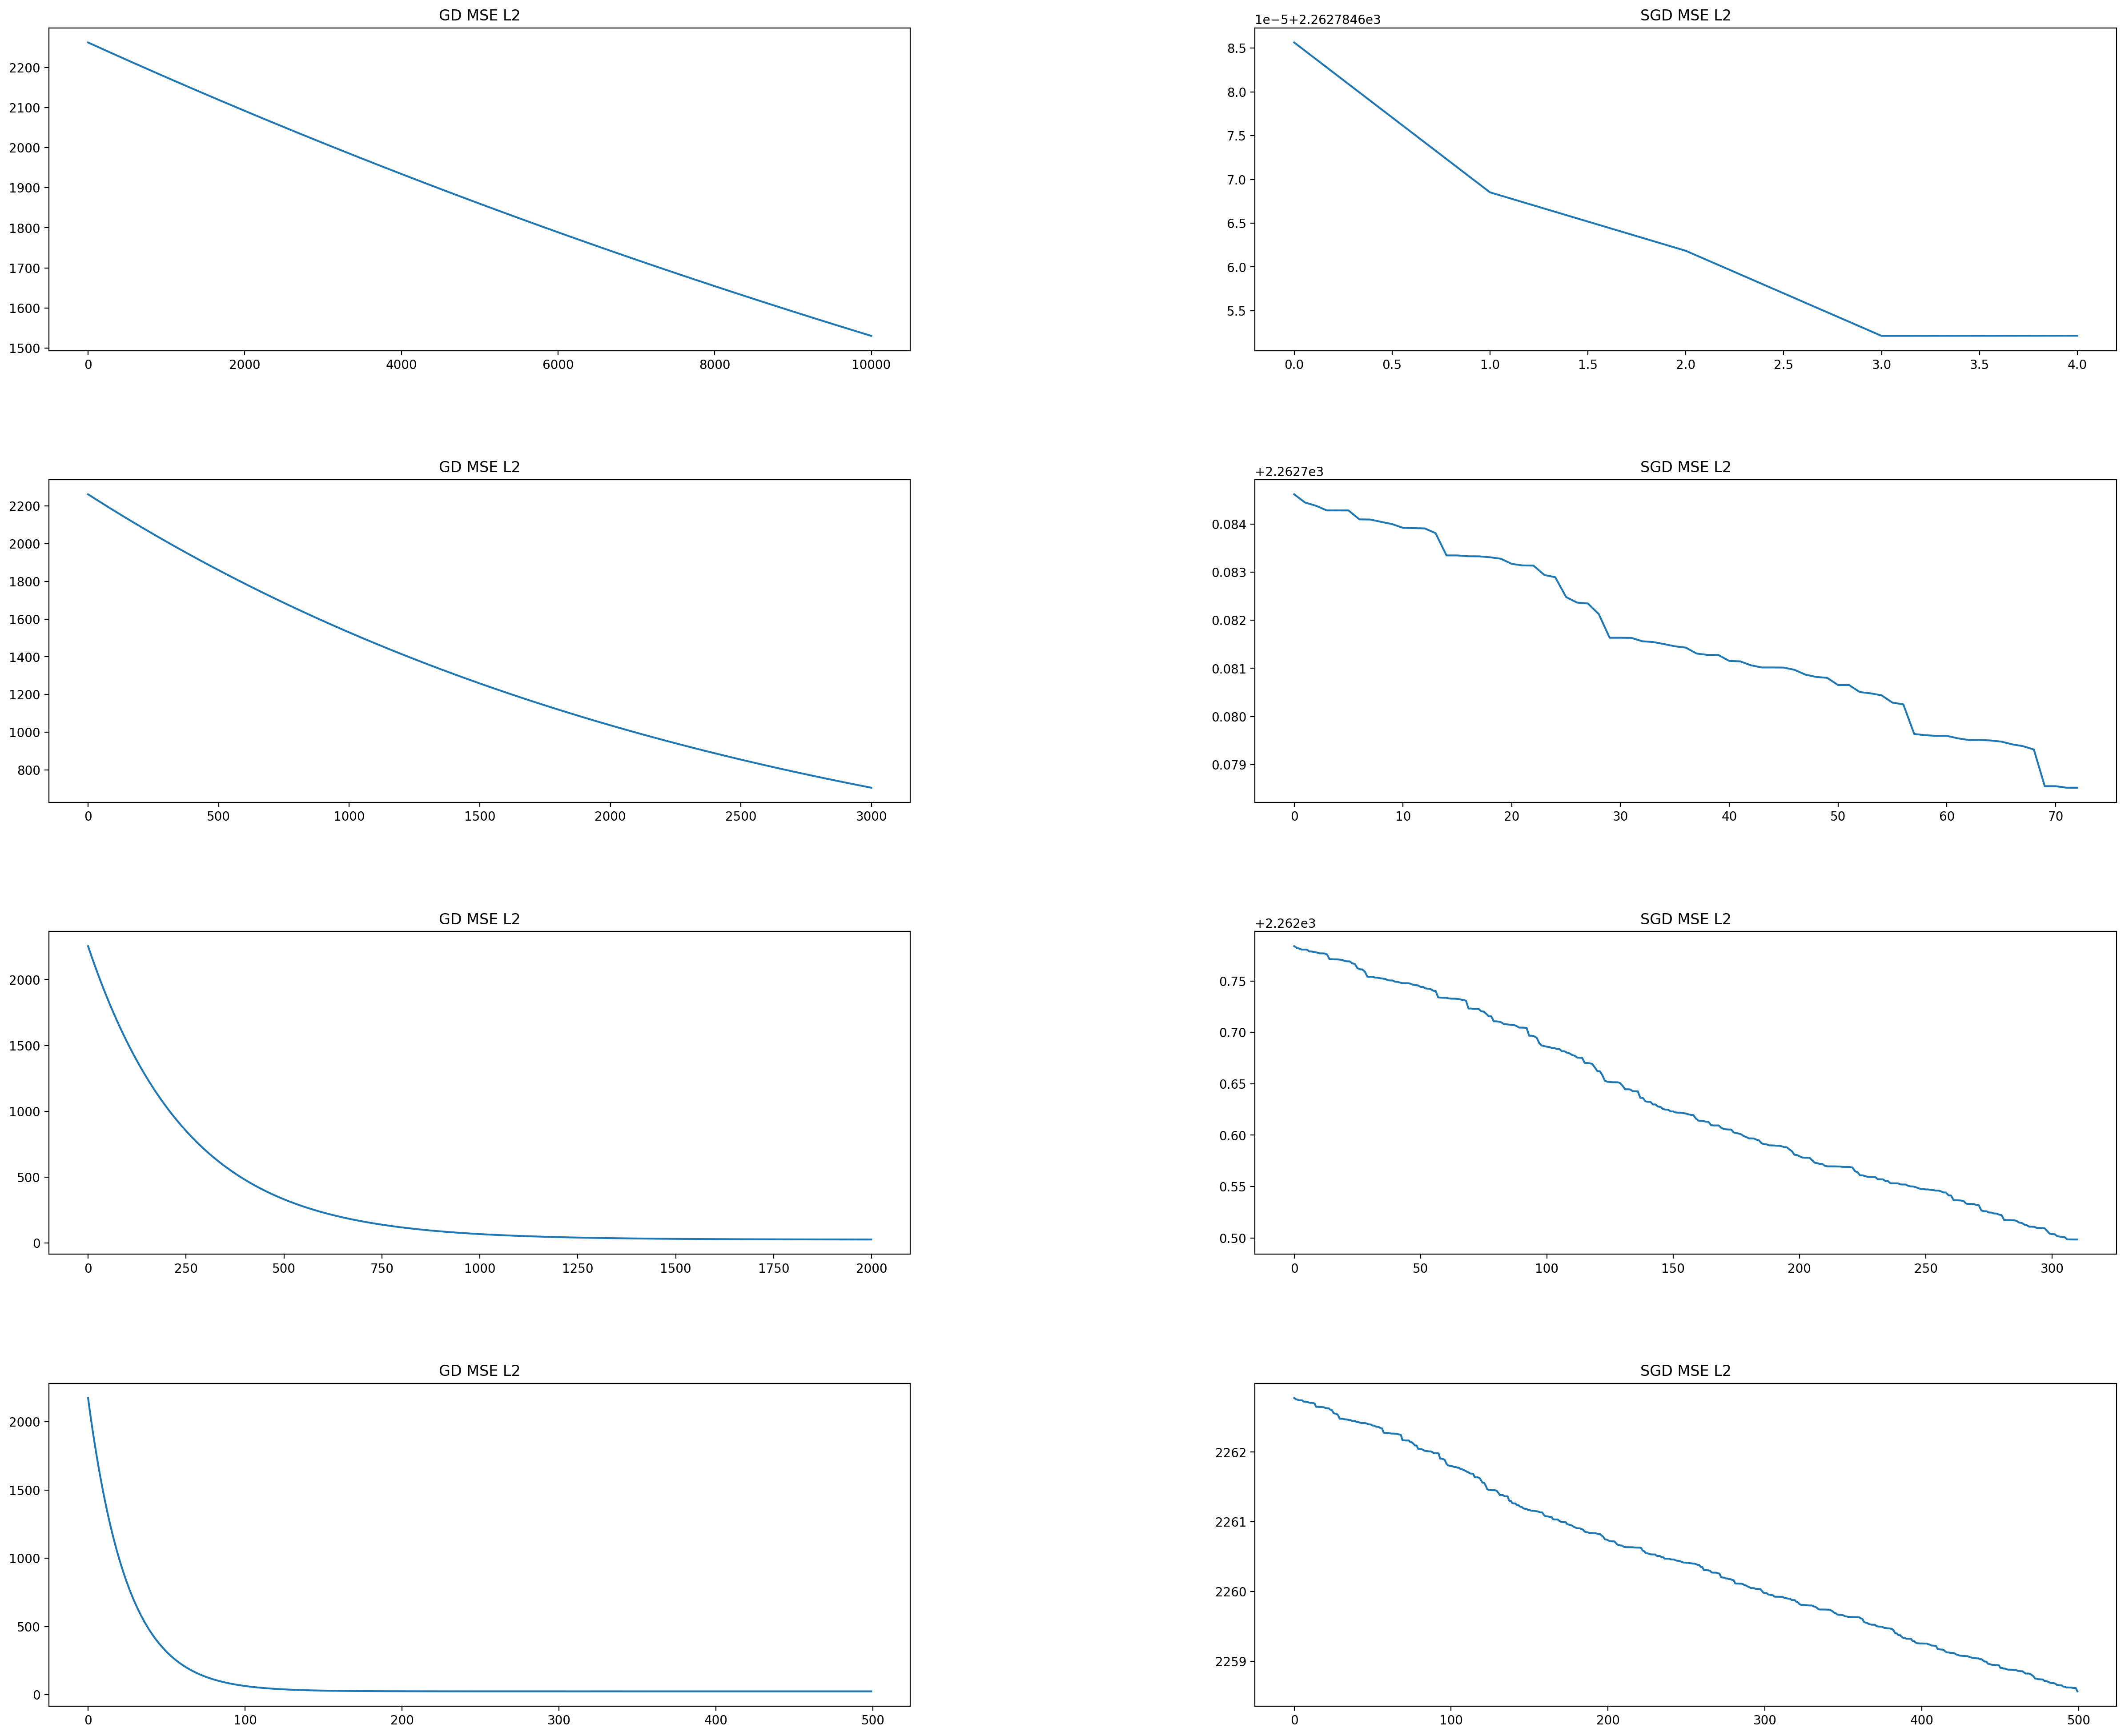

In [6]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(10000, 0.00001),(3000, 0.0001),(2000,0.001),(500,0.01)]

count =0

for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title(f'GD MSE L2')
    ax1.set_title(f"SGD MSE L2")
    
    W_GD_l2, MSE_GD_l2 = gd_l2(X=data, Y=target, iterations=n_iter, alpha=lr, lambda_=1e-4)
    W_SGD_l2, MSE_SGD_l2 = sgd_l2(X=data, Y=target, iterations=n_iter, alpha=lr, lambda_=1e-4)
    
    ax.plot(range(len(MSE_GD_l2)), MSE_GD_l2)
    ax1.plot(range(len(MSE_SGD_l2)), MSE_SGD_l2)  

### 3. [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [7]:
def gd_l1(X, Y, iterations, alpha, lambda_):
    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    while weight_dist > min_weight_dist and iter_num < iterations:
        new_w = w - 2 * alpha * (np.dot(X.T, (np.dot(X, w) - Y)) + lambda_ * np.sign(w)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        errors.append(calc_mse(X, new_w, Y))
    
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
    return w_list, errors

def sgd_l1(X, Y, iterations, alpha, lambda_):
    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    np.random.seed(40)
    
    while weight_dist > min_weight_dist and iter_num < iterations:
        train_ind = np.random.randint(X.shape[0])
        new_w = w - 2 * alpha * (np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - Y[train_ind])) + lambda_ * np.sign(w)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        w_list.append(new_w.copy())
        errors.append(calc_mse(X, new_w, Y))
        
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
    return w_list, errors

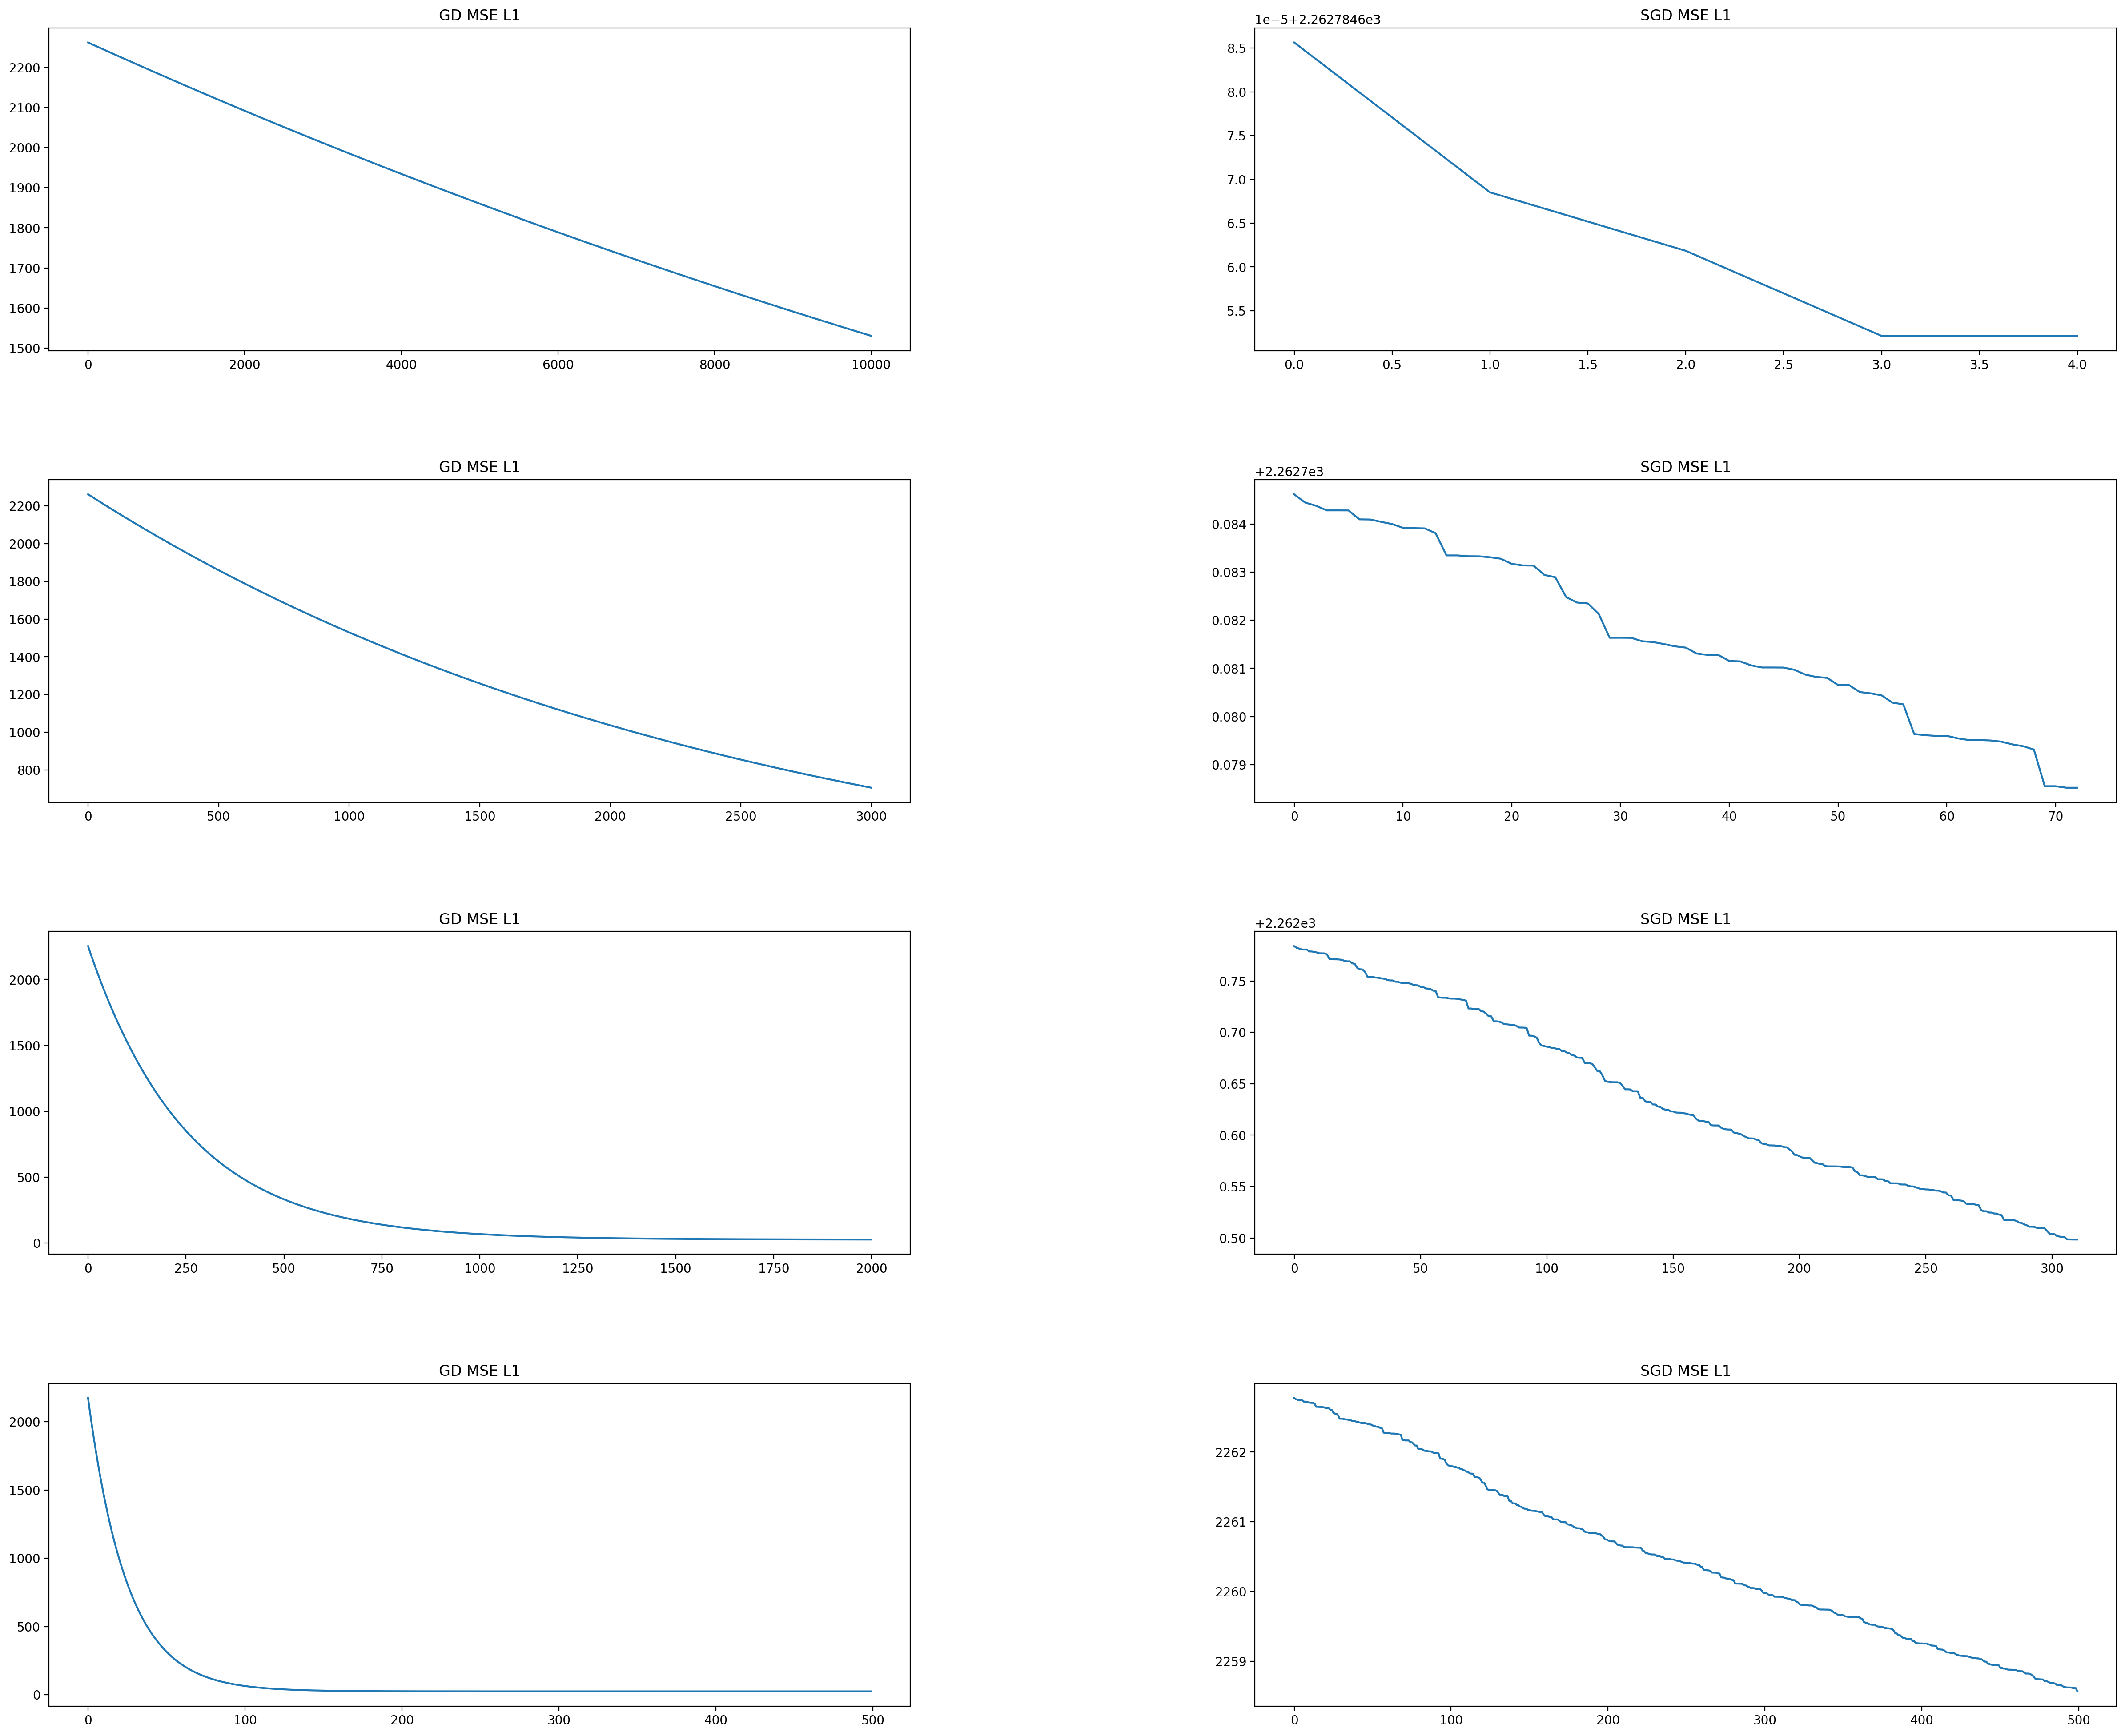

In [8]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(10000, 0.00001),(3000, 0.0001),(2000,0.001),(500,0.01)]

count =0

for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title(f'GD MSE L1')
    ax1.set_title(f"SGD MSE L1")
    
    W_GD_l1, MSE_GD_l1 = gd_l1(X=data, Y=target, iterations=n_iter, alpha=lr, lambda_=1e-8)
    W_SGD_l1, MSE_SGD_l1 = sgd_l1(X=data, Y=target, iterations=n_iter, alpha=lr, lambda_=1e-8)
    
    ax.plot(range(len(MSE_GD_l1)), MSE_GD_l1)
    ax1.plot(range(len(MSE_SGD_l1)), MSE_SGD_l1) 